# Shrinkage Regression Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('Hitters.csv')

In [5]:
df.shape

(322, 20)

In [6]:
# drop NAs

In [7]:
d0 = df.dropna()

In [8]:
d0.shape

(263, 20)

In [9]:
d0[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
y = d0.Salary

In [11]:
x = d0.drop(['Salary'],axis = 1)

In [12]:
x.shape

(263, 19)

In [13]:
# substitute categorical columns with dummy vars

In [14]:
x[['League','Division','NewLeague']] = pd.get_dummies(x[['League','Division','NewLeague']],drop_first=True)

In [15]:
x[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0


In [16]:
x.dtypes

AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
League       uint8
Division     uint8
PutOuts      int64
Assists      int64
Errors       int64
NewLeague    uint8
dtype: object

In [17]:
X = x.astype('float64')

In [18]:
X.dtypes

AtBat        float64
Hits         float64
HmRun        float64
Runs         float64
RBI          float64
Walks        float64
Years        float64
CAtBat       float64
CHits        float64
CHmRun       float64
CRuns        float64
CRBI         float64
CWalks       float64
League       float64
Division     float64
PutOuts      float64
Assists      float64
Errors       float64
NewLeague    float64
dtype: object

## Ridge Regression

In [19]:
# create an array of 100 alpha values

In [20]:
alphas = np.linspace(10,-2,100)

In [21]:
alphas = 10**alphas

In [22]:
alphas.min()

0.01

In [23]:
alphas.max()

10000000000.0

In [24]:
# fit 100 Ridge regression models, one for each alpha

In [25]:
model = Ridge(normalize = True)

In [26]:
coefs = []

In [27]:
for a in alphas:
    model.set_params(alpha = a)
    model.fit(X,y)
    coefs.append(model.coef_)

In [28]:
df = pd.DataFrame(coefs)

In [29]:
df.columns = x.columns

In [30]:
df[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,1.208960e-10,4.385439e-10,1.767095e-09,7.416108e-10,7.833741e-10,9.219831e-10,3.770512e-09,1.038009e-11,3.820171e-11,2.880936e-10,7.664116e-11,7.909536e-11,8.368224e-11,-1.288205e-09,-1.733945e-08,4.842285e-11,7.909202e-12,-3.687777e-11,-2.559176e-10
1,1.598174e-10,5.797292e-10,2.335995e-09,9.803659e-10,1.035574e-09,1.218807e-09,4.984395e-09,1.372187e-11,5.050041e-11,3.808428e-10,1.013151e-10,1.045594e-10,1.106230e-10,-1.702931e-09,-2.292173e-08,6.401216e-11,1.045550e-11,-4.875024e-11,-3.383080e-10
2,2.112692e-10,7.663679e-10,3.088048e-09,1.295986e-09,1.368969e-09,1.611192e-09,6.589076e-09,1.813951e-11,6.675858e-11,5.034518e-10,1.339326e-10,1.382214e-10,1.462371e-10,-2.251174e-09,-3.030118e-08,8.462031e-11,1.382156e-11,-6.444495e-11,-4.472232e-10
3,2.792855e-10,1.013093e-09,4.082218e-09,1.713217e-09,1.809696e-09,2.129901e-09,8.710371e-09,2.397936e-11,8.825091e-11,6.655336e-10,1.770510e-10,1.827205e-10,1.933168e-10,-2.975920e-09,-4.005638e-08,1.118631e-10,1.827128e-11,-8.519243e-11,-5.912028e-10
4,3.691990e-10,1.339250e-09,5.396451e-09,2.264772e-09,2.392311e-09,2.815603e-09,1.151460e-08,3.169931e-11,1.166625e-10,8.797963e-10,2.340510e-10,2.415458e-10,2.555535e-10,-3.933991e-09,-5.295217e-08,1.478764e-10,2.415356e-11,-1.126194e-10,-7.815353e-10


In [31]:
df.round(3)[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0


In [32]:
df.round(3)[-5:]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
95,-1.031,3.747,-0.920,0.695,0.535,4.064,-10.579,-0.014,0.160,0.720,0.403,0.301,-0.403,57.629,-124.203,0.272,0.215,-3.842,-23.693
96,-1.187,4.220,-0.596,0.488,0.430,4.371,-10.891,-0.022,0.170,0.725,0.463,0.318,-0.457,58.938,-124.215,0.274,0.235,-3.855,-25.357
97,-1.335,4.689,-0.216,0.250,0.313,4.662,-10.943,-0.031,0.179,0.722,0.531,0.336,-0.507,59.905,-123.955,0.276,0.253,-3.842,-26.519
98,-1.468,5.136,0.199,-0.010,0.190,4.928,-10.754,-0.042,0.186,0.707,0.606,0.357,-0.553,60.611,-123.493,0.278,0.270,-3.810,-27.252
99,-1.584,5.546,0.632,-0.280,0.064,5.165,-10.360,-0.053,0.192,0.678,0.685,0.381,-0.595,61.128,-122.894,0.279,0.286,-3.767,-27.641


In [33]:
# plot coefficients vs alphas

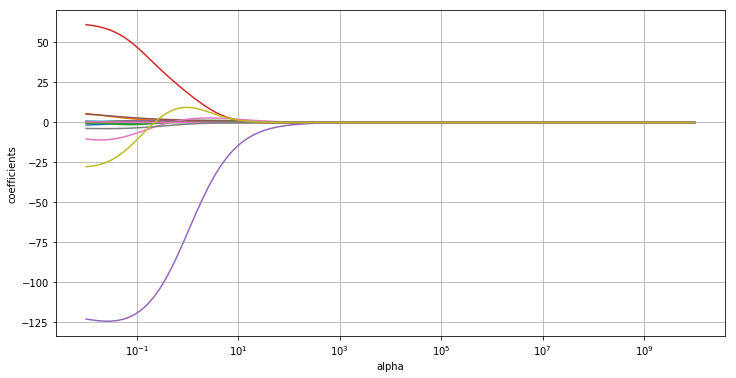

In [37]:
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.grid()

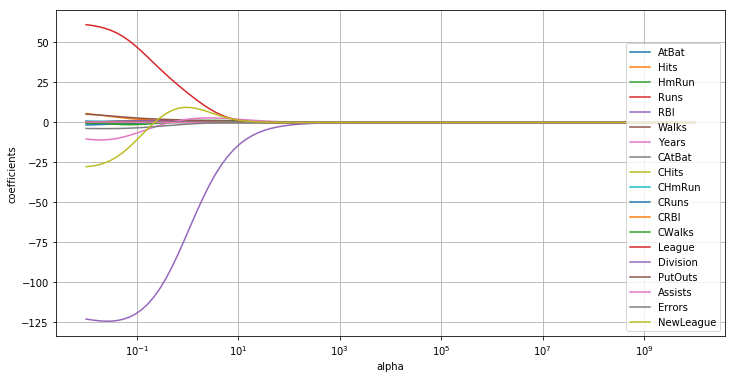

In [41]:
plt.figure(figsize=(12,6))
ax = plt.gca()
for i in range(19):
    aux = np.array(coefs)[:,i]
    ax.plot(alphas,aux,label = x.columns.values[i])
    ax.set_xscale('log')
plt.legend(loc=4)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.grid()

### Validation approach with fixed alpha

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state=1)

In [43]:
# fit model with alpha = 4.0

In [44]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train,y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [45]:
# model coefs

In [46]:
pd.DataFrame(ridge2.coef_,index = X.columns)

,0
AtBat,0.098658
Hits,0.446094
HmRun,1.412107
Runs,0.660773
RBI,0.843403
Walks,1.008473
Years,2.779882
CAtBat,0.008244
CHits,0.034149
CHmRun,0.268634


In [47]:
# test MSE (alpha = 4)

In [48]:
pred2 = ridge2.predict(X_test)
mean_squared_error(y_test,pred2)

106216.52238005563

In [49]:
# compare Salary with predicted salary

In [50]:
df = pd.DataFrame()

In [51]:
df['Salary'] = y_test
df['Predicted'] = pred2
df[:5]

,Salary,Predicted
126,500.0,463.369745
13,700.0,349.309231
207,700.0,651.747055
221,210.0,533.997460
68,105.0,509.718624


In [52]:
df.shape

(132, 2)

In [53]:
# fit model with huge alpha = 10^9

In [54]:
ridge3 = Ridge(alpha = 10**9, normalize = True)
ridge3.fit(X_train,y_train)

Ridge(alpha=1000000000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [55]:
print(pd.Series(ridge3.coef_, index = x.columns))

AtBat        1.317464e-09
Hits         4.647486e-09
HmRun        2.079865e-08
Runs         7.726175e-09
RBI          9.390640e-09
Walks        9.769219e-09
Years        3.961442e-08
CAtBat       1.060533e-10
CHits        3.993605e-10
CHmRun       2.959428e-09
CRuns        8.245247e-10
CRBI         7.795450e-10
CWalks       9.894387e-10
League      -2.501281e-08
Division    -1.549951e-07
PutOuts      7.268991e-10
Assists     -2.615885e-11
Errors       2.084514e-09
NewLeague   -2.023196e-08
dtype: float64


In [56]:
# all coeffs very close to zero

In [57]:
# test MSE

In [58]:
pred3 = ridge3.predict(X_test)
mean_squared_error(y_test,pred3)

172862.234750706

In [59]:
# Over-shrinking makes model with higher test MSE

## Linear Regression (alpha = 0)

In [60]:
ridge0 = Ridge(alpha = 0, normalize = True)
ridge0.fit(X_train,y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [61]:
print(pd.Series(ridge0.coef_,index = x.columns))

AtBat         -1.821115
Hits           4.259156
HmRun         -4.773401
Runs          -0.038760
RBI            3.984578
Walks          3.470126
Years          9.498236
CAtBat        -0.605129
CHits          2.174979
CHmRun         2.979306
CRuns          0.266356
CRBI          -0.598456
CWalks         0.171383
League       133.743163
Division    -113.743875
PutOuts        0.421063
Assists        0.464379
Errors        -6.024576
NewLeague    -81.927763
dtype: float64


In [62]:
pred = ridge0.predict(X_test)
mean_squared_error(y_test,pred)

116690.46856660438

In [63]:
# with alpha = 4

In [64]:
mean_squared_error(y_test,pred2)

106216.52238005563

In [65]:
# Ridge regression with alpha = 4 is better predictor model than OLS

## Ridge Regression cross validation to find best alpha

In [66]:
ridgecv = RidgeCV(alphas = alphas, scoring ='neg_mean_squared_error',
                   normalize = True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000e+10, 7.56463e+09, ..., 1.32194e-02, 1.00000e-02]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [67]:
# best alpha

In [68]:
ridgecv.alpha_

0.49770235643321137

In [69]:
# test MSE of best alpha

In [70]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train,y_train)
mean_squared_error(y_test,ridge4.predict(X_test))

99997.35172902551

In [71]:
# even better than that of alpha = 4.0

In [72]:
ridge4.fit(X,y)
pd.Series(ridge4.coef_,index = x.columns)

AtBat         0.039089
Hits          0.987271
HmRun         0.210328
Runs          1.108092
RBI           0.875440
Walks         1.778644
Years         0.351680
CAtBat        0.011224
CHits         0.063656
CHmRun        0.443470
CRuns         0.126382
CRBI          0.135001
CWalks        0.033335
League       26.494555
Division    -90.056030
PutOuts       0.188256
Assists       0.040423
Errors       -1.751570
NewLeague     7.580892
dtype: float64

## Lasso Regression

In [73]:
lasso_model = Lasso(max_iter = 10000, normalize = True)

In [74]:
coefs = []

In [75]:
for a in alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(X_train,y_train)
    coefs.append(lasso_model.coef_)

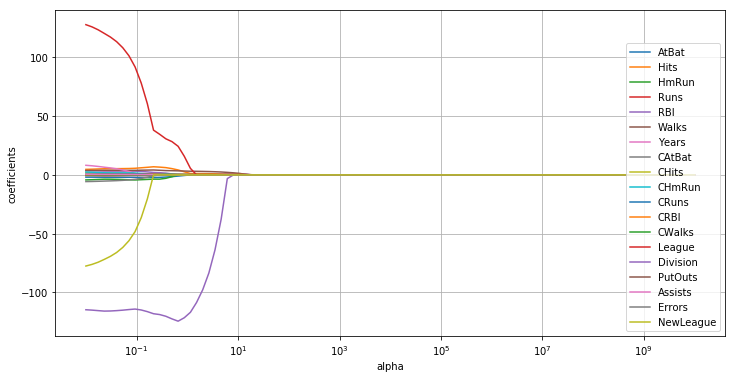

In [76]:
plt.figure(figsize = (12,6))
ax = plt.gca()
for i in range(19):
    aux = np.array(coefs)[:,i]
    ax.plot(alphas,aux,label=x.columns.values[i])
    ax.set_xscale('log')
plt.legend(loc=4)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.grid()

## LASSO cross validation to find best alpha

In [77]:
lassocv = LassoCV(alphas=alphas,cv=10,max_iter=10000,normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(alphas=array([1.00000e+10, 7.56463e+09, ..., 1.32194e-02, 1.00000e-02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [78]:
# best alpha

In [79]:
lassocv.alpha_

2.656087782946684

In [80]:
# test MSE of best alpha

In [81]:
lasso_model.set_params(alpha = lassocv.alpha_)
lasso_model.fit(X_train,y_train)

Lasso(alpha=2.656087782946684, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
mean_squared_error(y_test,lasso_model.predict(X_test))

105162.1584888249

In [83]:
# not as good as Ridge regression (RR test MSE is 99997.35)

In [84]:
df4 = pd.DataFrame(lasso_model.coef_,index = x.columns, columns = ['lasso_coeff'])

In [85]:
df4

,lasso_coeff
AtBat,0.000000
Hits,1.060003
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,2.859441
Years,0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,0.206718


In [86]:
# 13 regression coeffs equal to zero (when using best alpha)

In [87]:
# coeffs for new predictions -use full dataset

In [88]:
lasso_model.fit(X,y)

Lasso(alpha=2.656087782946684, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
df5 = pd.DataFrame(lasso_model.coef_,index=x.columns,columns = ['lasso_coef'])
df5

,lasso_coef
AtBat,0.000000
Hits,1.645595
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,1.903195
Years,0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,0.000000


In [90]:
# predictors in lasso simplified model are

In [91]:
df5[df5.lasso_coef != 0]

,lasso_coef
Hits,1.645595
Walks,1.903195
CRuns,0.181064
CRBI,0.377327
Division,-55.866160
PutOuts,0.152331
